In [1]:
import numpy as np
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import plotly_express as px

from PIL import Image
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def iter_pd(df):
    for val in df.columns:
        yield val
    for row in df.to_numpy():
        for val in row:
            if pd.isna(val):
                yield ""
            else:
                yield val

def pandas_to_sheets(pandas_df, sheet, clear = True):
    # Updates all values in a workbook to match a pandas dataframe
    if clear:
        sheet.clear()
    (row, col) = pandas_df.shape
    cells = sheet.range("A1:{}".format(gspread.utils.rowcol_to_a1(row + 1, col)))
    for cell, val in zip(cells, iter_pd(pandas_df)):
        cell.value = val
    sheet.update_cells(cells)

def open_ws(sheet, ws_name):
    scope = ['https://spreadsheets.google.com/feeds',
            'https://www.googleapis.com/auth/drive']

    credentials = ServiceAccountCredentials.from_json_keyfile_name(
                                        'google-credentials.json', scope) # Your json file here

    gc = gspread.authorize(credentials)

    ws = gc.open(sheet).worksheet(ws_name)

    return ws

def read_ws_data(ws):

    data = ws.get_all_values()
    headers = data.pop(0)

    df = pd.DataFrame(data, columns=headers)

    return df

In [3]:
def limpieza_string(string):
    string=string.replace("."," ")
    string=string.replace(","," ")
    string=string.replace(";"," ")
    string=string.replace("?"," ")
    string=string.replace("¿"," ")
    string=string.replace("!"," ")
    string=string.replace("¡"," ")
    string=string.replace("\n"," ")
    string=string.replace("  "," ")
    string=string.replace("  "," ")
    string=string.replace("  "," ")
    string=string.replace("  "," ")
    string=string.replace('"'," ")   
    string=string.replace('('," ")  
    string=string.replace(')'," ")  
    string=string.replace(':'," ") 
    string=string.replace('-'," ") 
    string=string.replace('/'," ") 
    
    return string

In [153]:
df = read_ws_data(open_ws("Caso Atlas Bank - BD Feedback de Clientes", "Feedback"))
df

,Fecha,Pais,Dispositivo,Browser,Rank,Comentario
0,8/8/2019,Peru,phone,Chrome Mobile 76.0.3809,1,No consigo lo que deseo. No consigo agendar un...
1,8/8/2019,Peru,desktop,Chrome 76.0.3809,1,
2,8/9/2019,Peru,phone,Chrome Mobile 42.0.2311,1,
3,8/9/2019,Peru,desktop,Chrome 75.0.3770,1,
4,8/9/2019,Peru,phone,Chrome Mobile 75.0.3770,1,No se como registrarme para mi clave
...,...,...,...,...,...,...
11045,2019-09-03 14:39:59,Peru,phone,Samsung Internet 9.4,5,Muy bueno...!!!
11046,2019-09-02 19:43:06,Peru,phone,Mobile Safari 12.0,5,
11047,2019-09-02 16:24:04,Peru,phone,Chrome Mobile 76.0.3809,5,buena
11048,2019-09-02 14:13:51,Peru,phone,Chrome Mobile 64.0.3282,5,


In [154]:
df["Fecha"] = pd.to_datetime(df.Fecha)
df["Fecha"] = df["Fecha"]
df["Fecha_clean"] = df.Fecha.astype(str).str[:10]
df["Fecha_clean"] = df["Fecha_clean"].astype(str)
df["counter"] = 1
df["Comentario_clean"] = df["Comentario"].fillna("").apply(lambda x: limpieza_string(x).lower())
df["Comentario_space"] = df["Comentario_clean"].apply(lambda x: x+" " if x!="" else "")
df["Rank_text"] = df["Rank"].replace({"1":"Uno", "2":"Dos", "3":"Tres", "4":"Cuatro", "5":"Cinco"})
df["Rank"] = df["Rank"].astype(float)
df["Browser_clean"] = df.Browser.apply(lambda x: x[:x.rfind(" ")])
df["id"] = df.index
df

,Fecha,Pais,Dispositivo,Browser,Rank,Comentario,Fecha_clean,counter,Comentario_clean,Comentario_space,Rank_text,Browser_clean,id
0,2019-08-08 00:00:00,Peru,phone,Chrome Mobile 76.0.3809,1.0,No consigo lo que deseo. No consigo agendar un...,2019-08-08,1,no consigo lo que deseo no consigo agendar una...,no consigo lo que deseo no consigo agendar una...,Uno,Chrome Mobile,0
1,2019-08-08 00:00:00,Peru,desktop,Chrome 76.0.3809,1.0,,2019-08-08,1,,,Uno,Chrome,1
2,2019-08-09 00:00:00,Peru,phone,Chrome Mobile 42.0.2311,1.0,,2019-08-09,1,,,Uno,Chrome Mobile,2
3,2019-08-09 00:00:00,Peru,desktop,Chrome 75.0.3770,1.0,,2019-08-09,1,,,Uno,Chrome,3
4,2019-08-09 00:00:00,Peru,phone,Chrome Mobile 75.0.3770,1.0,No se como registrarme para mi clave,2019-08-09,1,no se como registrarme para mi clave,no se como registrarme para mi clave,Uno,Chrome Mobile,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11045,2019-09-03 14:39:59,Peru,phone,Samsung Internet 9.4,5.0,Muy bueno...!!!,2019-09-03,1,muy bueno,muy bueno,Cinco,Samsung Internet,11045
11046,2019-09-02 19:43:06,Peru,phone,Mobile Safari 12.0,5.0,,2019-09-02,1,,,Cinco,Mobile Safari,11046
11047,2019-09-02 16:24:04,Peru,phone,Chrome Mobile 76.0.3809,5.0,buena,2019-09-02,1,buena,buena,Cinco,Chrome Mobile,11047
11048,2019-09-02 14:13:51,Peru,phone,Chrome Mobile 64.0.3282,5.0,,2019-09-02,1,,,Cinco,Chrome Mobile,11048


In [155]:
df_daily = df[["Fecha_clean", "counter"]].groupby("Fecha_clean", as_index=False).sum()
df_daily = df_daily.merge(df[["Fecha_clean", "Comentario_space"]].groupby("Fecha_clean", as_index=False).sum(), on="Fecha_clean")
df_daily = df_daily.merge(df[["Fecha_clean", "Rank"]].groupby("Fecha_clean", as_index=False).mean(), on="Fecha_clean")
df_daily["Rank"] = df_daily["Rank"].round(4)
df_daily

,Fecha_clean,counter,Comentario_space,Rank
0,2019-08-08,34,no consigo lo que deseo no consigo agendar una...,3.0588
1,2019-08-09,30,no se como registrarme para mi clave muchas ve...,3.0000
2,2019-08-10,40,sale otro idioma 😡 no puedo bloquear mi tarjet...,2.3500
3,2019-08-11,36,quiero hacer una trransferencia a mi hija a ot...,2.8889
4,2019-08-12,52,quiero henerar clave y no puedo q pasos debo ...,3.3462
...,...,...,...,...
200,2020-02-24,74,la pagina de banca por internet cada vez que...,3.6216
201,2020-02-25,46,me rechaza mi numero de tarjeta apezar q esta ...,3.3043
202,2020-02-26,56,quiero cambiar la contraseña y no me deja no p...,2.8214
203,2020-02-27,34,hasta el momento nunca puedo ingresar por el a...,2.8235


In [156]:
print(df_daily.counter.mean())
px.line(df_daily, x="Fecha_clean", y="counter", title="Feedbacks diarios")

53.90243902439025


In [157]:
print(df_daily.Rank.mean())
px.line(df_daily, x="Fecha_clean", y="Rank", title="Ranking promedio")

2.9668351219512195


In [158]:
df_pais = df[["Pais", "counter"]].groupby("Pais", as_index=False).sum()
df_pais = df_pais.merge(df[["Pais", "Comentario_space"]].groupby("Pais", as_index=False).sum(), on="Pais")
df_pais = df_pais.merge(df[["Pais", "Rank"]].groupby("Pais", as_index=False).mean(), on="Pais")
df_pais["Rank"] = df_pais["Rank"].round(4)
df_pais

,Pais,counter,Comentario_space,Rank
0,Argentina,12,para finalizar la creación de la clave digital...,2.1667
1,Australia,2,,2.0000
2,Bolivia,22,wow wow,2.3636
3,Brazil,10,,3.0000
4,Canada,8,tengo serios problemas desde que han cambiado ...,2.2500
5,Chile,34,malo muy malo mala estoy tratando de llamar a ...,2.1765
6,Colombia,12,llevo escribiendo resto estoy em colombia y no...,3.5000
7,Dominican Republic,2,sexe sexe,1.0000
8,Ecuador,2,,2.0000
9,Ethiopia,4,estoy en europa ahora y mi tarjeta de credito ...,2.0000


In [159]:
print(df_pais.counter.mean())
px.line(df_pais, x="Pais", y="counter", title="Feedbacks diarios")

425.0


In [160]:
print(df_pais.Rank.mean())
px.line(df_pais, x="Pais", y="Rank", title="Ranking promedio")

2.3661884615384614


In [161]:
df_browser = df[["Browser_clean", "counter"]].groupby("Browser_clean", as_index=False).sum()
df_browser = df_browser.merge(df[["Browser_clean", "Comentario_space"]].groupby("Browser_clean", as_index=False).sum(), on="Browser_clean")
df_browser = df_browser.merge(df[["Browser_clean", "Rank"]].groupby("Browser_clean", as_index=False).mean(), on="Browser_clean")
df_browser["Rank"] = df_browser["Rank"].round(4)
df_browser

,Browser_clean,counter,Comentario_space,Rank
0,Android,18,,3.4444
1,Chrome,2240,no puedo bloquear mi tarjeta mediante web l a...,2.5009
2,Chrome Mobile,6532,no consigo lo que deseo no consigo agendar una...,3.0343
3,Chrome Mobile WebView,114,muy mala más o menos porque no me da una resp...,3.6667
4,Chrome Mobile iOS,158,no pasa nada no puedo obtener mi clsve no encu...,2.7089
5,Edge,74,la banca por internet es un asco la versión ...,2.0270
6,Facebook,644,no respondes porque lo responden nunca su can...,3.7764
7,Firefox,80,no puedo entrar a banca por internet hay que ...,2.5000
8,Firefox Mobile,2,muy mala muy mala,1.0000
9,IE,82,no puedo ingresar sale una cara y quiere que a...,1.8293


In [162]:
print(df_browser.counter.mean())
px.line(df_browser, x="Browser_clean", y="counter", title="Feedbacks diarios")

650.0


In [163]:
print(df_browser.Rank.mean())
px.line(df_browser, x="Browser_clean", y="Rank", title="Ranking promedio")

2.8751529411764705


In [164]:
df_dispositivo = df[["Dispositivo", "counter"]].groupby("Dispositivo", as_index=False).sum()
df_dispositivo = df_dispositivo.merge(df[["Dispositivo", "Comentario_space"]].groupby("Dispositivo", as_index=False).sum(), on="Dispositivo")
df_dispositivo = df_dispositivo.merge(df[["Dispositivo", "Rank"]].groupby("Dispositivo", as_index=False).mean(), on="Dispositivo")
df_dispositivo["Rank"] = df_dispositivo["Rank"].round(4)
df_dispositivo

,Dispositivo,counter,Comentario_space,Rank
0,desktop,2522,no puedo bloquear mi tarjeta mediante web l a...,2.4576
1,phone,8438,no consigo lo que deseo no consigo agendar una...,3.1071
2,tablet,90,horrible no se conecta mejor es el bbva no pue...,2.5778


In [165]:
print(df_dispositivo.counter.mean())
px.line(df_dispositivo, x="Dispositivo", y="counter", title="Feedbacks diarios")

3683.3333333333335


In [166]:
print(df_dispositivo.Rank.mean())
px.line(df_dispositivo, x="Dispositivo", y="Rank", title="Ranking promedio")

2.714166666666667


In [167]:
df_rank = df[["Rank_text", "counter"]].groupby("Rank_text", as_index=False).sum()
df_rank = df_rank.merge(df[["Rank_text", "Comentario_space"]].groupby("Rank_text", as_index=False).sum(), on="Rank_text")
df_rank = df_rank.merge(df[["Rank_text", "Rank"]].groupby("Rank_text", as_index=False).mean(), on="Rank_text")
df_rank["Rank"] = df_rank["Rank"].round(4)
df_rank

,Rank_text,counter,Comentario_space,Rank
0,Cinco,2144,bueno u rápido excelente el servicio pero el...,5.0
1,Cuatro,2732,me parecio concreto e interactivo me gusta pk ...,4.0
2,Dos,1386,no puedo encontrar como generar mi clave de 4 ...,2.0
3,Tres,1720,amigo como puedo conseguir mi clave de interne...,3.0
4,Uno,3068,no consigo lo que deseo no consigo agendar una...,1.0


In [168]:
print(df_rank.counter.mean())
px.line(df_rank, x="Rank_text", y="counter", title="Feedbacks diarios")

2210.0


In [169]:
print(df_rank.Rank.mean())
px.line(df_rank, x="Rank_text", y="Rank", title="Ranking promedio")

3.0


In [170]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")

loading configuration file https://huggingface.co/pysentimiento/robertuito-sentiment-analysis/resolve/main/config.json from cache at C:\Users\JTorrejon/.cache\huggingface\transformers\034fd09e9530137fb6e6c042529972a92619fb02df8b40e7a4cfc50090943c46.98e658c5b8878c67807e3287b07db9608dbd08a5b69ce09979c447190bbe8077
Model config RobertaConfig {
  "_name_or_path": "pysentimiento/robertuito-sentiment-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEG",
    "1": "NEU",
    "2": "POS"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEG": 0,
    "NEU": 1,
    "POS": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12,

In [171]:
def sentiment(x):
    if x=="": return [np.nan, np.nan, np.nan, np.nan]
    else:
        sent = analyzer.predict(x)
        return [sent.output, sent.probas["POS"], sent.probas["NEU"], sent.probas["NEG"]]

df[["Comentario_SENT", "Comentario_POS", "Comentario_NEU", "Comentario_NEG"]] = df.apply(lambda x: sentiment(x["Comentario_clean"]), axis=1, result_type="expand")
df

,Fecha,Pais,Dispositivo,Browser,Rank,Comentario,Fecha_clean,counter,Comentario_clean,Comentario_space,Rank_text,Browser_clean,id,Comentario_SENT,Comentario_POS,Comentario_NEU,Comentario_NEG
0,2019-08-08 00:00:00,Peru,phone,Chrome Mobile 76.0.3809,1.0,No consigo lo que deseo. No consigo agendar un...,2019-08-08,1,no consigo lo que deseo no consigo agendar una...,no consigo lo que deseo no consigo agendar una...,Uno,Chrome Mobile,0,NEG,0.000645,0.015267,0.984088
1,2019-08-08 00:00:00,Peru,desktop,Chrome 76.0.3809,1.0,,2019-08-08,1,,,Uno,Chrome,1,NaN,NaN,NaN,NaN
2,2019-08-09 00:00:00,Peru,phone,Chrome Mobile 42.0.2311,1.0,,2019-08-09,1,,,Uno,Chrome Mobile,2,NaN,NaN,NaN,NaN
3,2019-08-09 00:00:00,Peru,desktop,Chrome 75.0.3770,1.0,,2019-08-09,1,,,Uno,Chrome,3,NaN,NaN,NaN,NaN
4,2019-08-09 00:00:00,Peru,phone,Chrome Mobile 75.0.3770,1.0,No se como registrarme para mi clave,2019-08-09,1,no se como registrarme para mi clave,no se como registrarme para mi clave,Uno,Chrome Mobile,4,NEU,0.001449,0.606674,0.391877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11045,2019-09-03 14:39:59,Peru,phone,Samsung Internet 9.4,5.0,Muy bueno...!!!,2019-09-03,1,muy bueno,muy bueno,Cinco,Samsung Internet,11045,POS,0.855111,0.137802,0.007088
11046,2019-09-02 19:43:06,Peru,phone,Mobile Safari 12.0,5.0,,2019-09-02,1,,,Cinco,Mobile Safari,11046,NaN,NaN,NaN,NaN
11047,2019-09-02 16:24:04,Peru,phone,Chrome Mobile 76.0.3809,5.0,buena,2019-09-02,1,buena,buena,Cinco,Chrome Mobile,11047,NEU,0.172290,0.620165,0.207545
11048,2019-09-02 14:13:51,Peru,phone,Chrome Mobile 64.0.3282,5.0,,2019-09-02,1,,,Cinco,Chrome Mobile,11048,NaN,NaN,NaN,NaN


In [172]:
df["Comentario_SENT"].value_counts(), df[["Comentario_POS", "Comentario_NEU", "Comentario_NEG"]].mean()

(NEG    1640
 NEU    1322
 POS     548
 Name: Comentario_SENT, dtype: int64,
 Comentario_POS    0.182636
 Comentario_NEU    0.332923
 Comentario_NEG    0.484441
 dtype: float64)

Rank:  1.0
 
Rank:  2.0
 
Rank:  3.0
 
Rank:  4.0
 
Rank:  5.0
 


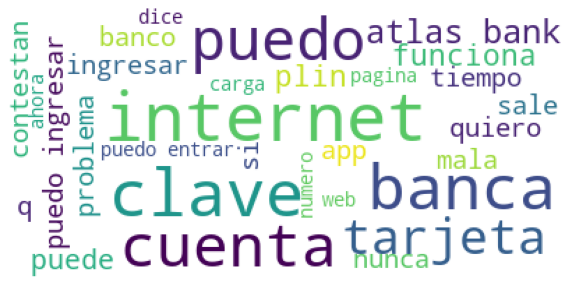

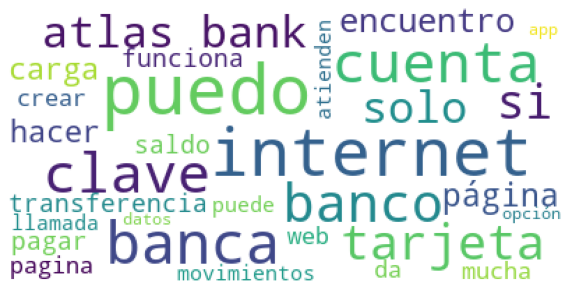

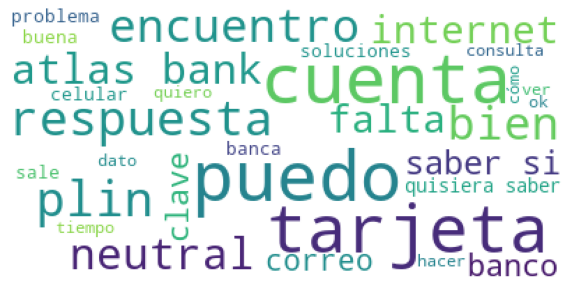

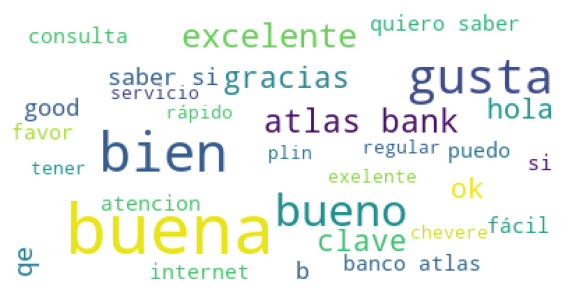

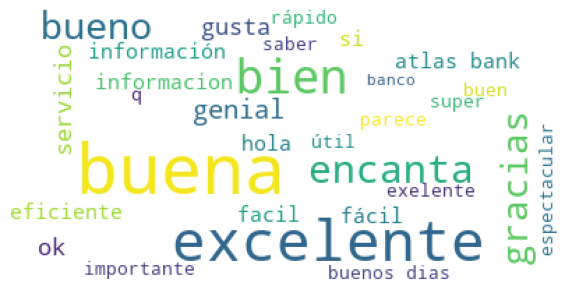

In [173]:
sw = set(stopwords.words("spanish"))
sw.update(["."," "]) # <<<Podemos agregar más cosas aquí

df_comentada = df[df["Comentario_clean"]!=""]
for i in df_comentada["Rank"].unique():
    print("Rank: ", i)
    text = " ".join(str(t) for t in df_comentada[df_comentada["Rank"]==i]["Comentario_clean"].values)

    # Create the WordCloud Object
    wordcloud = WordCloud(stopwords=sw, background_color="white", 
                              mode="RGBA", max_words=30,
                              max_font_size=50, min_font_size=10).generate(text)

    plt.figure(figsize=[10,10])
    plt.imshow(wordcloud)
    plt.axis("off")
    print(" ")

Rank:  NEG
 
Rank:  NEU
 
Rank:  POS
 


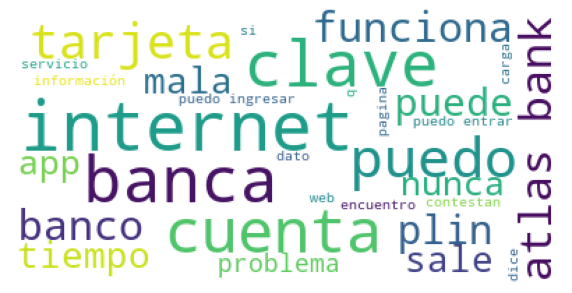

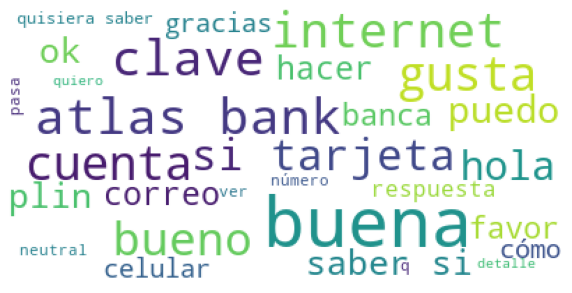

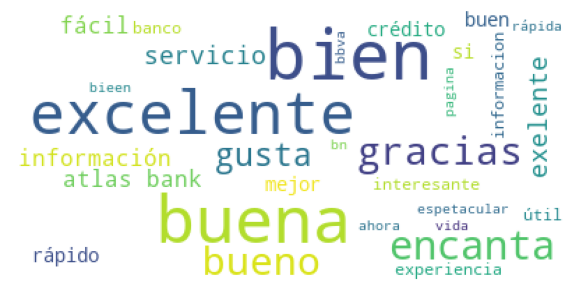

In [174]:
for i in df_comentada["Comentario_SENT"].unique():
    print("Rank: ", i)
    text = " ".join(str(t) for t in df_comentada[df_comentada["Comentario_SENT"]==i]["Comentario_clean"].values)

    # Create the WordCloud Object
    wordcloud = WordCloud(stopwords=sw, background_color="white", 
                              mode="RGBA", max_words=30,
                              max_font_size=50, min_font_size=10).generate(text)

    plt.figure(figsize=[10,10])
    plt.imshow(wordcloud)
    plt.axis("off")
    print(" ")

In [175]:
df_daily[["Comentario_SENT", "Comentario_POS", "Comentario_NEU", "Comentario_NEG"]] = df_daily.apply(lambda x: sentiment(x["Comentario_space"]), axis=1, result_type="expand")

df_daily["Comentario_SENT"].value_counts(), df_daily[["Comentario_POS", "Comentario_NEU", "Comentario_NEG"]].mean()

(NEG    156
 NEU     33
 POS     13
 Name: Comentario_SENT, dtype: int64,
 Comentario_POS    0.074515
 Comentario_NEU    0.167995
 Comentario_NEG    0.757490
 dtype: float64)

In [176]:
df_daily[["Rank", "Comentario_POS"]].corr()

,Rank,Comentario_POS
Rank,1.000000,0.413721
Comentario_POS,0.413721,1.000000


Comentario_SENT:  NEG
 
Comentario_SENT:  NEU
 
Comentario_SENT:  POS
 


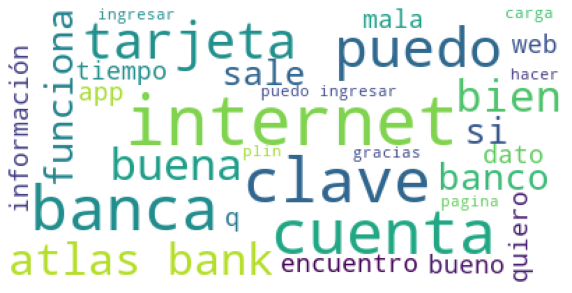

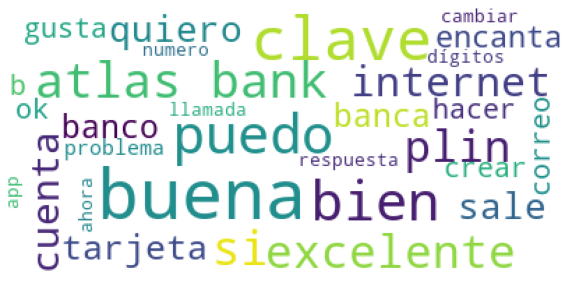

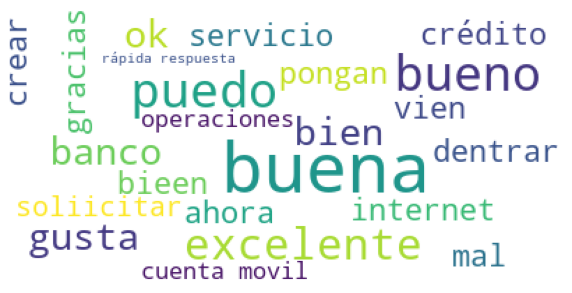

In [177]:
df_daily_comentada = df_daily[df_daily["Comentario_space"]!=""]

for i in df_daily_comentada["Comentario_SENT"].unique():
    print("Comentario_SENT: ", i)
    text = " ".join(str(t) for t in df_daily_comentada[df_daily_comentada["Comentario_SENT"]==i]["Comentario_space"].values)

    # Create the WordCloud Object
    wordcloud = WordCloud(stopwords=sw, background_color="white", 
                              mode="RGBA", max_words=30,
                              max_font_size=50, min_font_size=10).generate(text)

    plt.figure(figsize=[10,10])
    plt.imshow(wordcloud)
    plt.axis("off")
    print(" ")

In [178]:
def df_contains_word(df, col, w):
    return df[(df[col].str.contains(f" {w} ")) | (df[col].str.endswith(f" {w}")) | (df[col].str.startswith(f"{w} "))]

In [179]:
all_w = [x for x in list(set(df["Comentario_space"].values.sum().split())) if x not in sw]
df_all_w = pd.DataFrame()

cat_columns = ["Fecha_clean", "Pais", "Dispositivo", "Browser_clean", "Rank_text", "Comentario_SENT"]
val_columns = ["Rank", "Comentario_POS", "Comentario_NEU", "Comentario_NEG"]

for w in all_w:
    #print(w)
    df_w = df_contains_word(df, "Comentario_clean", w)
    df_w["word"] = w
    df_all_w = pd.concat([df_all_w, df_w])
    #print(len(df_w))
    #df_w_temp = df_w[cat_columns+["counter"]].groupby(cat_columns, as_index=False).sum()
    #df_w_temp = df_w_temp.merge(df_w[cat_columns+["Comentario_space"]].groupby(cat_columns, as_index=False).sum(), on=cat_columns, how="outer")
    #df_w_temp = df_w_temp.merge(df_w[cat_columns+val_columns].groupby(cat_columns, as_index=False).mean(), on=cat_columns, how="outer")
    #df_w_temp["word"] = w
    #print(df_w_temp)
    #df_all_w = pd.concat([df_all_w, df_w_temp])
    
df_all_w.reset_index(drop=True, inplace=True)
df_all_w

C:\Users\JTORRE~1\AppData\Local\Temp/ipykernel_11996/876476870.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Fecha,Pais,Dispositivo,Browser,Rank,Comentario,Fecha_clean,counter,Comentario_clean,Comentario_space,Rank_text,Browser_clean,id,Comentario_SENT,Comentario_POS,Comentario_NEU,Comentario_NEG,word
0,2019-12-04 16:19:13,Peru,phone,Chrome Mobile 78.0.3904,1.0,Me molesta porque no tiene solución para un pr...,2019-12-04,1,me molesta porque no tiene solución para un pr...,me molesta porque no tiene solución para un pr...,Uno,Chrome Mobile,976,NEG,0.000284,0.002204,0.997512,cache
1,2019-12-04 16:19:13,Peru,phone,Chrome Mobile 78.0.3904,1.0,Me molesta porque no tiene solución para un pr...,2019-12-04,1,me molesta porque no tiene solución para un pr...,me molesta porque no tiene solución para un pr...,Uno,Chrome Mobile,6501,NEG,0.000284,0.002204,0.997512,cache
2,2020-02-13 03:41:11,Chile,desktop,Chrome 79.0.3945,1.0,"no puedo ingresar a la pagina, al parecer olvi...",2020-02-13,1,no puedo ingresar a la pagina al parecer olvid...,no puedo ingresar a la pagina al parecer olvid...,Uno,Chrome,527,NEU,0.002116,0.900802,0.097082,parecer
3,2019-11-07 20:40:22,Canada,desktop,Chrome 78.0.3904,1.0,Tengo serios problemas desde que han cambiado ...,2019-11-07,1,tengo serios problemas desde que han cambiado ...,tengo serios problemas desde que han cambiado ...,Uno,Chrome,1136,NEG,0.000402,0.012644,0.986954,parecer
4,2020-02-13 03:41:11,Chile,desktop,Chrome 79.0.3945,1.0,"no puedo ingresar a la pagina, al parecer olvi...",2020-02-13,1,no puedo ingresar a la pagina al parecer olvid...,no puedo ingresar a la pagina al parecer olvid...,Uno,Chrome,6052,NEU,0.002116,0.900802,0.097082,parecer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15831,2019-10-30 08:30:08,Peru,phone,Chrome Mobile 78.0.3904,5.0,"Buenísima app, Enserio lo mejor que pude tener...",2019-10-30,1,buenísima app enserio lo mejor que pude tener ...,buenísima app enserio lo mejor que pude tener ...,Cinco,Chrome Mobile,10811,POS,0.997826,0.001238,0.000936,buenísima
15832,2019-12-18 19:59:24,Peru,phone,Chrome Mobile 79.0.3945,3.0,No encuentro ningún acceso para hacer reclamos...,2019-12-18,1,no encuentro ningún acceso para hacer reclamos...,no encuentro ningún acceso para hacer reclamos...,Tres,Chrome Mobile,2748,NEG,0.001093,0.192236,0.806672,beneficios
15833,2019-12-18 19:59:24,Peru,phone,Chrome Mobile 79.0.3945,3.0,No encuentro ningún acceso para hacer reclamos...,2019-12-18,1,no encuentro ningún acceso para hacer reclamos...,no encuentro ningún acceso para hacer reclamos...,Tres,Chrome Mobile,8273,NEG,0.001093,0.192236,0.806672,beneficios
15834,2020-01-17 14:13:04,Peru,phone,Chrome Mobile 79.0.3945,3.0,"Todavía no podría opinar ,no recibo atención aún.",2020-01-17,1,todavía no podría opinar no recibo atención aún,todavía no podría opinar no recibo atención aún,Tres,Chrome Mobile,2642,NEG,0.001708,0.343402,0.654890,todavía


In [180]:
df_all_w.word.value_counts().head(40)

puedo          440
internet       274
banca          250
clave          228
cuenta         178
bank           148
buena          148
atlas          138
hacer          136
ingresar       130
si             126
quiero         122
tarjeta        120
bien           102
puede           96
sale            92
plin            88
banco           84
entrar          80
ver             78
funciona        76
crear           74
gusta           72
tiempo          68
información     68
excelente       68
encuentro       68
mas             66
gracias         66
servicio        66
app             66
token           64
web             64
4               62
q               62
saber           62
bueno           60
nunca           58
necesito        56
ahora           56
Name: word, dtype: int64

In [181]:
df["Fecha_clean"].astype(str).str.replace("-","/")

0        2019/08/08
1        2019/08/08
2        2019/08/09
3        2019/08/09
4        2019/08/09
            ...    
11045    2019/09/03
11046    2019/09/02
11047    2019/09/02
11048    2019/09/02
11049    2019/09/01
Name: Fecha_clean, Length: 11050, dtype: object

In [182]:
pandas_to_sheets(df.drop(columns=["Fecha"]), open_ws("Caso Atlas Bank - BD Feedback de Clientes", "df_final"), clear = True)
pandas_to_sheets(df_all_w.drop(columns=["Fecha"]), open_ws("Caso Atlas Bank - BD Feedback de Clientes", "df_w"), clear = True)